In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import clear_output
from scipy import signal
from matplotlib import cm
!pip install tsaug
!pip install obspy
import tsaug
from obspy import read
from obspy.signal.invsim import cosine_taper
from obspy.signal.filter import highpass
from obspy.signal.trigger import classic_sta_lta, plot_trigger, trigger_onset
clear_output()

In [2]:
lunar_y_train = pd.read_csv('/kaggle/input/nasa-seismic-detection/lunar/train/lunar_train_catalog.csv')
lunar_y_train.drop(['time_abs(%Y-%m-%dT%H:%M:%S.%f)','evid','mq_type'], axis=1, inplace=True)
lunar_y_train.rename({'time_rel(sec)':'Relative Time (sec)'}, axis=1, inplace=True)
lunar_y_train.head(10)

,filename,Relative Time (sec)
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,73500.0
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,12720.0
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,73020.0
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,4440.0
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,52140.0
5,xa.s12.00.mhz.1970-06-15HR00_evid00008,68400.0
6,xa.s12.00.mhz.1970-06-26HR00_evid00009,72060.0
7,xa.s12.00.mhz.1970-07-20HR00_evid00010,18360.0
8,xa.s12.00.mhz.1970-07-20HR00_evid00011,42240.0
9,xa.s12.00.mhz.1970-09-26HR00_evid00013,71820.0


In [3]:
lunar_X_train1 = pd.read_csv('/kaggle/input/nasa-seismic-detection/lunar/train/S12_GradeA/xa.s12.00.mhz.1970-03-25HR00_evid00003.csv')
lunar_X_train1.drop(['time_abs(%Y-%m-%dT%H:%M:%S.%f)',], axis=1, inplace=True)
lunar_X_train1.rename({'time_rel(sec)':'Relative Time (sec)','velocity(m/s)':'Velocity (m/s)'}, axis=1, inplace=True)
lunar_X_train1.head(10)

,Relative Time (sec),Velocity (m/s)
0,0.000000,-5.481780e-15
1,0.150943,-6.878653e-15
2,0.301887,-7.486137e-15
3,0.452830,-7.191481e-15
4,0.603774,-6.287278e-15
5,0.754717,-5.219201e-15
6,0.905660,-4.288885e-15
7,1.056604,-3.521489e-15
8,1.207547,-2.755610e-15
9,1.358491,-1.844109e-15


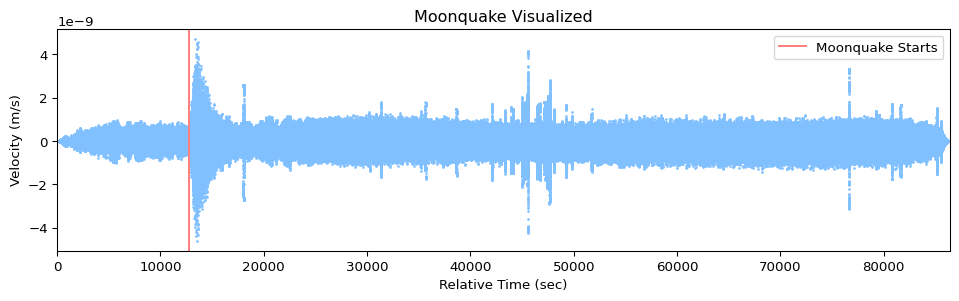

In [4]:
fig,ax = plt.subplots(1,1,figsize=(12,3),dpi=96)
times = np.array(lunar_X_train1['Relative Time (sec)'].tolist())
velocities = np.array(lunar_X_train1['Velocity (m/s)'].tolist())
ax.scatter(times,velocities,color='#80c0ff',s=1,linewidths=1)
ax.set_xlim([min(times),max(times)])
ax.set_xlabel('Relative Time (sec)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Moonquake Visualized')
moonquake_begins = ax.axvline(x=lunar_y_train.iloc[1]['Relative Time (sec)'], c='#ff8080', label='Moonquake Starts')
ax.legend(handles=[moonquake_begins])
plt.show()

Text(0, 0.5, 'Characteristic Function')

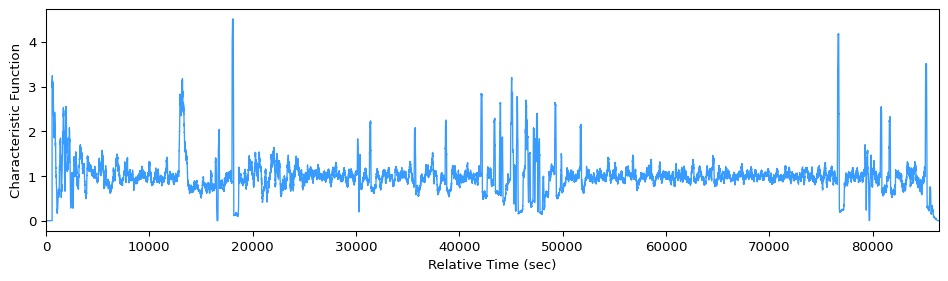

In [5]:
sampling_rate = round(1/(lunar_X_train1.iloc[1]['Relative Time (sec)']-lunar_X_train1.iloc[0]['Relative Time (sec)']),12)
cft = classic_sta_lta(velocities, int(120 * sampling_rate), int(600 * sampling_rate))
fig,ax = plt.subplots(1,1,figsize=(12,3),dpi=96)
ax.plot(times,cft,color='#379bff',linewidth=1)
ax.set_xlim([min(times),max(times)])
ax.set_xlabel('Relative Time (sec)')
ax.set_ylabel('Characteristic Function')